In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn import BCELoss
from torch import optim
from matplotlib import pyplot as plt

In [2]:
X = torch.tensor([1, 5, 10, 10, 25, 50, 70, 75, 100], dtype= torch.float32)
y = torch.tensor([0, 0, 0, 0, 0, 1, 1, 1, 1], dtype= torch.float32)

In [3]:
class LogisticRegressionDataLoader(Dataset):
    def __init__(self, X, y):
        super().__init__()
        self.X = X.reshape(-1, 1)
        self.y = y.reshape(-1, 1)
    
    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, index):
        return self.X[index], self.y[index]

In [8]:
class LogisticRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)
        # note no parameters for sigmoid as it takes only 1D data to convert it to probability
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        z = self.linear(x)
        return self.sigmoid(z)

In [9]:
model = LogisticRegression()
dataset = LogisticRegressionDataLoader(X= X, y= y)
dataloader = DataLoader(dataset= dataset, batch_size= dataset.__len__(), shuffle= True)
criterion = BCELoss()
optimizer = optim.SGD(model.parameters(), lr= 0.001)


In [13]:
loss_list = []
model.train()
for epoch in range(100):
    loss = 0.0
    for input, target in dataloader:
        optimizer.zero_grad()
        output = model(input)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        print(f'parameters - weights = {model.linear.weight.item()}, bias = {model.linear.bias.item()}, loss = {loss.item()}')
        loss = loss.detach().numpy()
        loss_list.append(loss)

parameters - weights = 0.026137443259358406, bias = 0.13109026849269867, loss = 0.5676717758178711
parameters - weights = 0.026142438873648643, bias = 0.13081258535385132, loss = 0.567594587802887
parameters - weights = 0.02614743262529373, bias = 0.13053493201732635, loss = 0.5675175189971924
parameters - weights = 0.02615242823958397, bias = 0.13025730848312378, loss = 0.5674403309822083
parameters - weights = 0.026157421991229057, bias = 0.1299797147512436, loss = 0.5673633217811584
parameters - weights = 0.026162415742874146, bias = 0.1297021359205246, loss = 0.5672861933708191
parameters - weights = 0.026167409494519234, bias = 0.129424586892128, loss = 0.5672092437744141
parameters - weights = 0.026172403246164322, bias = 0.12914706766605377, loss = 0.5671320557594299
parameters - weights = 0.02617739886045456, bias = 0.12886957824230194, loss = 0.5670550465583801
parameters - weights = 0.0261823907494545, bias = 0.1285921186208725, loss = 0.5669779777526855
parameters - weights 

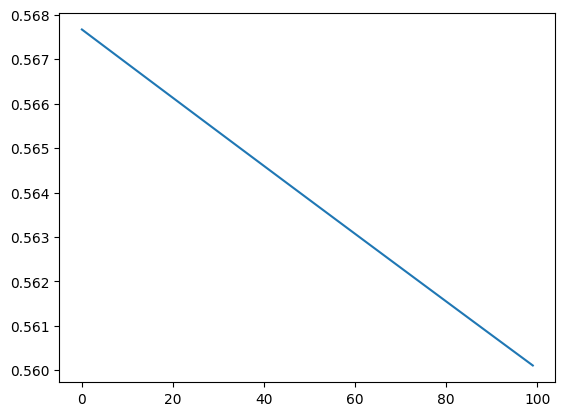

In [14]:
plt.plot(loss_list)
plt.show()